# Alphavirus RdRp conservation Analysis

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Entrez, SeqIO, AlignIO
from Bio.PDB import PDBParser, PDBIO, Chain

import ast


pd.set_option('display.max_columns', 110)

## Shannon Entropy

Entropy measures the amount of information or uncertainty in the column. Lower entropy indicates more order or less randomness (high conservation), and higher entropy suggests more disorder or greater randomness (less conservation).

The formula for Shannon entropy is given by:

$$
H = -\sum_{i=1}^{n} p_i \log_2 p_i
$$

Where:
- \( H \) is the Shannon entropy,
- \( p_i \) represents the probability of each unique character occurring at a position in the sequence,
- The sum is taken over all unique characters.


## Effective Number (N<sub>eff</sub>)

Given the entropy \(H\) in natural log at different positions in a alignment, the effective number (Neff) can be calculated using the following formula:
Neff represents the "effective diversity" or "effective redundancy" in a aligment column. In the context of th 20 natural amino acid, neff of 1, mean the column is complety conserved, where we have just o amino acid across the position aligned. A neff of 20, means complete random, where all 20 amino acids where  found, in equally porpotion.


#### Effective Number Calculation N<sub>eff</sub>

The effective number N<sub>eff</sub> for each position, derived from the entropy, is given by:

$$
N_{eff} = e^H
$$



In [84]:
def calculate_entropy(column):
    """Calculate the Shannon entropy of a column in the alignment."""
    column_list = [x for x in column if x != '-'] # Remove gaps, if they exist
    
    unique, counts = np.unique(column_list, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log(probabilities)) # - ensure that after summation of each AA entropy the result is positive. I can use log2 to make the results in bits, as the weblog
    return entropy


def neff(entropies):
    #neff = [np.exp(H) for H in entropies]
    neff = np.exp(entropies)
    return neff


# Mapping conservation to PDB file

## Concat files

In [ ]:
#cat data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4.fasta data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_filtered.fasta > data/alphavirus/alphavirus_rvdb_nsp4_concat.fasta


## Align them

In [ ]:
#mafft --auto data/alphavirus/alphavirus_rvdb_nsp4_concat.fasta > data/alphavirus/alphavirus_rvdb_nsp4_concat_aligned.fasta


In [85]:
seq_aligment = "data/alphavirus/alphavirus_rvdb_nsp4_concat_aligned.fasta"
alignment = AlignIO.read(seq_aligment, "fasta")

# create a dictionary with the sequences, to create a data frame
dict_align = {} 
for record in alignment:
    # removing / added during alignment
    dict_align[record.id.split('/')[0]] = list(record.seq)
# create a data frame with the sequences aligned
mtx = pd.DataFrame.from_dict(dict_align, orient='index')
nsp4_mtx_annot_sites = mtx.iloc[:, 2432-1:3046].copy()
nsp4_mtx_annot_sites

,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045
QBM15857.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,Q,S,V,R,Q,H,D,L,P,L,P,T,W,E,R,K,L,P,E,I,F,H,P,P,R,F,N,A,A,K,E,E,L,L,R,H,R,M,Q,M,A,...,W,N,R,V,G,I,R,E,Q,L,K,K,S,L,F,S,R,Y,G,V,Q,F,T,D,L,V,L,D,G,L,S,C,L,S,K,S,I,K,N,F,N,H,L,R,G,T,L,R,H,L,Y,V,-,-,-
AAD14566.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,V,L,S,E,V,V,L,E,R,T,L,L,D,D,V,Y,A,P,R,L,D,L,N,K,E,E,L,L,R,K,K,L,Q,L,N,...,W,N,R,A,G,I,S,V,E,L,C,K,A,V,E,S,R,Y,E,I,V,G,T,S,I,I,I,A,A,M,A,T,L,A,R,N,V,A,T,F,K,H,L,R,G,N,P,I,H,L,Y,G,-,-,-
AAN05101.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,S,V,L,P,V,N,T,L,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,A,K,E,Q,L,L,L,K,K,L,Q,E,S,...,W,Q,R,T,G,L,I,D,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,S,V,V,V,M,S,M,A,T,F,A,S,S,R,S,N,F,E,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
AJD20059.2,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,S,V,L,P,V,N,T,L,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,A,K,E,Q,L,L,L,K,K,L,Q,E,S,...,W,Q,R,T,G,L,I,D,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,S,V,V,V,M,S,M,A,T,F,A,S,S,R,S,N,F,E,K,L,R,G,P,V,I,T,L,Y,G,G,P,K
AAD14550.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,V,L,S,E,V,V,L,E,R,T,E,L,E,I,S,Y,A,P,R,L,D,L,E,K,E,E,L,L,R,K,K,L,Q,L,N,...,W,N,R,V,G,I,L,P,E,L,C,K,A,V,E,S,R,Y,E,T,V,G,T,S,V,I,V,M,A,M,A,T,L,A,S,S,V,K,S,F,S,Y,L,R,G,A,S,I,T,L,Y,G,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_647496.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,R,K,R,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
QJQ40140.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,K,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,V,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
QZA74868.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,R,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
AGT42224.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,K,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,V,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-


In [ ]:
# from Bio.Seq import Seq
# from Bio.SeqRecord import SeqRecord

# records = []

# for index, row in nsp4_mtx_annot_sites.iterrows():
#     seq = ''.join(row.values)
#     record = SeqRecord(Seq(seq), id=index)
#     records.append(record)

# # Write the SeqRecord objects to a FASTA file
# SeqIO.write(records, "data/alphavirus/alphavirus_rvdb_nsp4_concat_aligned_filter_nsp4_region_v03.fasta", "fasta")

In [86]:
for idx, value in nsp4_mtx_annot_sites.loc['AAN05101.1', :].items():
    if value == '-':
        print(idx, value)

2524 -
2665 -
2669 -
2711 -


In [87]:
nsp4_mtx_annot_sites.drop([2524,2665,2669,2711,], axis=1, inplace=True)

for idx, value in nsp4_mtx_annot_sites.loc['AAN05101.1', :].items():
    if value == '-':
        print(idx, value)

611


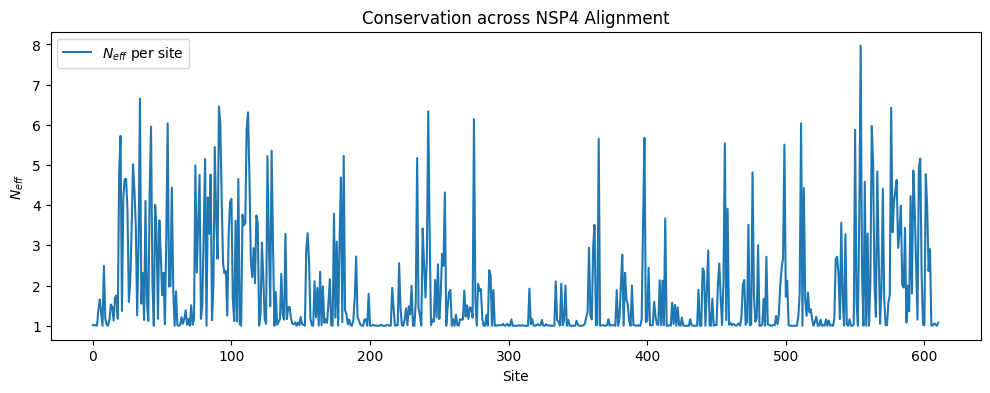

In [88]:
entropies = nsp4_mtx_annot_sites.apply(calculate_entropy).values
neff_values = neff(entropies)

print(len(neff_values))

plt.figure(figsize=(12, 4))
plt.title('Conservation across NSP4 Alignment')
plt.plot(neff_values, label='$N_{eff}$ per site')
plt.xlabel('Site')
plt.ylabel('$N_{eff}$')
plt.legend()
#plt.savefig('results/alphavirus/neff_conservation_nsp4_alphavirus_urvdb.png')
plt.show()

## recovery sequence from PDB

In [76]:
# extended version
parser = PDBParser()
structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended.pdb')
amino_acid_mapping = {
    'ALA': 'A','ARG': 'R','ASN': 'N','ASP': 'D','CYS': 'C','GLU': 'E',
    'GLN': 'Q','GLY': 'G','HIS': 'H','ILE': 'I','LEU': 'L','LYS': 'K',
    'MET': 'M','PHE': 'F','PRO': 'P','SER': 'S','THR': 'T','TRP': 'W','TYR': 'Y','VAL': 'V'
}
seq_pdb = []
for model in structure:
    for chain in model:
        for residue in chain:
            res_name = residue.get_resname()
            aa = amino_acid_mapping[res_name]
            seq_pdb.append(aa)
            
seq_pdb = ''.join(seq_pdb)

with open('data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended_pdb_seq.fasta', 'w') as f:
    f.write('>nsp4-RdRp-extended\n')
    f.write(seq_pdb)
seq_pdb

/stor/work/Wilke/luiz/vimos/venv/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END ' at line 9613
  warnings.warn(


'YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDEIKEQLLLKRLQESASTANRSRYQSRKVENMKAMIIHRLKEGCRLYLASDTPRVPSYRITYPAPIYSPSINIKLSNPETAVAVCNEFLARNYPTVASYQVTDEYDAYLDMVDGSESCLDRATFNPSKLRSYPKQHSYHAPTIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTMDSAAFNVECFKKYACNQEYWREFASSPIRVTTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTMDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIATHFKPGDAVLETDIASFDKSQDDSLALTAMMLLEDLGVDQPILDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEERLTTSACAAFIGDDNIIHGVVSDALMAARCATWMNMEVKIIDAVVSVKAPYFCGGFILHDTVTGTACRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVTRWQRTGLVTELERAVYSRYEVQGITAVITSMATFASSKENFKKLRGPVVTLYGGPK'

In [77]:
# compacted version
parser = PDBParser()
structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact.pdb')
amino_acid_mapping = {
    'ALA': 'A','ARG': 'R','ASN': 'N','ASP': 'D','CYS': 'C','GLU': 'E',
    'GLN': 'Q','GLY': 'G','HIS': 'H','ILE': 'I','LEU': 'L','LYS': 'K',
    'MET': 'M','PHE': 'F','PRO': 'P','SER': 'S','THR': 'T','TRP': 'W','TYR': 'Y','VAL': 'V'
}
seq_pdb = []
for model in structure:
    for chain in model:
        for residue in chain:
            res_name = residue.get_resname()
            aa = amino_acid_mapping[res_name]
            seq_pdb.append(aa)

seq_pdb = ''.join(seq_pdb)


with open('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_pdb_seq.fasta', 'w') as f:
    f.write('>nsp4-RdRp-compact\n')
    f.write(seq_pdb)

seq_pdb

'YIFSSDTGQGHLQQKSVRQTTLPVVIVEEVHEEKCYPPKLDEIKELLLLKRLQESASTANRSRYQSRKVENMKAMIIHRLKEGCRLYLASETPRVPSYRITYPAPIYSPSINIKLSNPETAVAVCNEFLARNYPTVASYQVTDEYDAYLDMVDGSESCLDRATFNPSKLRSYPKQHSYHAPTIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTMDSAAFNVECFKKYACNQEYWREFASSPIRVTTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTMDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIATHFKPGDAVLETDIASFDKSQDDSLALTAMMLLEDLGVDQPILDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEERLTTSACAAFIGDDNIIHGVVSDALMAARCATWMNMEVKIIDAVVSEKAPYFCGGFILHDTVTGTSCRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVTRWQRTGLVTELERAVYSRYEVQGITAVITSMATFANSKENFKKLRGPVVTLYGGPK'

In [5]:
# compacted version
parser = PDBParser()
structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103_chainX.pdb')
amino_acid_mapping = {
    'ALA': 'A','ARG': 'R','ASN': 'N','ASP': 'D','CYS': 'C','GLU': 'E',
    'GLN': 'Q','GLY': 'G','HIS': 'H','ILE': 'I','LEU': 'L','LYS': 'K',
    'MET': 'M','PHE': 'F','PRO': 'P','SER': 'S','THR': 'T','TRP': 'W','TYR': 'Y','VAL': 'V',
    'HIE': 'H',
}
seq_pdb = []
for model in structure:
    for chain in model:
        for residue in chain:
            res_name = residue.get_resname()
            aa = amino_acid_mapping[res_name]
            seq_pdb.append(aa)

seq_pdb = ''.join(seq_pdb)


with open('data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103.fasta', 'w') as f:
    f.write('>nsp4-RdRp-cisPro103\n')
    f.write(seq_pdb)

seq_pdb

'YIFSSDTGQGHLQQKSVRQTTLPVVIVEEVHEEKCYPPKLDEIKELLLLKRLQESASTANRSRYQSRKVENMKAMIIHRLKEGCRLYLASETPRVPSYRITYPAPIYSPSINIKLSNPETAVAVCNEFLARNYPTVASYQVTDEYDAYLDMVDGSESCLDRATFNPSKLRSYPKQHSYHAPTIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTMDSAAFNVECFKKYACNQEYWREFASSPIRVTTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTMDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIATHFKPGDAVLETDIASFDKSQDDSLALTAMMLLEDLGVDQPILDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEERLTTSACAAFIGDDNIIHGVVSDALMAARCATWMNMEVKIIDAVVSEKAPYFCGGFILHDTVTGTSCRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVTRWQRTGLVTELERAVYSRYEVQGITAVITSMATFANSKENFKKLRGPVVTLYGGPK'

## checking sequences

In [79]:
nsp4_ONNV = str(SeqIO.read('data/alphavirus/nsP4_ONNV.fasta', 'fasta').seq)
nsp4_ONNV

'YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDEIKEQLLLKRLQESASTANRSRYQSRKVENMKAMIIHRLKEGCRLYLASDTPRVPSYRITYPAPIYSPSINIKLSNPETAVAVCNEFLARNYPTVASYQVTDEYDAYLDMVDGSESCLDRATFNPSKLRSYPKQHSYHAPTIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTMDSAAFNVECFKKYACNQEYWREFASSPIRVTTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTMDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIATHFKPGDAVLETDIASFDKSQDDSLALTAMMLLEDLGVDQPILDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEERLTTSACAAFIGDDNIIHGVVSDALMAARCATWMNMEVKIIDAVVSVKAPYFCGGFILHDTVTGTACRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVTRWQRTGLVTELERAVYSRYEVQGITAVITSMATFASSKENFKKLRGPVVTLYGGPK'

In [80]:
### checking differences on pdb retrieved sequence and the ref ONNV seq
seq_pdb = str(SeqIO.read('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_pdb_seq.fasta', 'fasta').seq) # compacted

for i in range(len(seq_pdb)):
    if seq_pdb[i] != nsp4_ONNV[i]:
        print(i, seq_pdb[i],nsp4_ONNV[i])

24 V N
45 L Q
90 E D
499 E V
518 S A
590 N S


In [81]:
################# The extended version id exactly the same as the ONNV sequence
### checking differences on pdb retrieved sequence and the ref ONNV seq
seq_pdb = str(SeqIO.read('data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended_pdb_seq.fasta', 'fasta').seq) # extended

for i in range(len(seq_pdb)):
    if seq_pdb[i] != nsp4_ONNV[i]:
        print(i, seq_pdb[i],nsp4_ONNV[i])

## Mapping Neff to Sites of interest (SOI)

In [89]:
seq_pdb = str(SeqIO.read('data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended_pdb_seq.fasta', 'fasta').seq) # extended
amino_acid_mapping = {
    'A':'Ala', 'R':'Arg', 'N':'Asn', 'D':'Asp', 'C':'Cys', 'E':'Glu',
    'Q':'Gln', 'G':'Gly', 'H':'His', 'I':'Ile', 'L':'Leu', 'K':'Lys',
    'M':'Met', 'F':'Phe', 'P':'Pro', 'S':'Ser', 'T':'Thr', 'W':'Trp',
    'Y':'Tyr', 'V':'Val'}


neffDF = pd.DataFrame({
    'residueName': list(map(amino_acid_mapping.get, list(seq_pdb))),
    'residueAbbrev': list(seq_pdb),
    'residue': range(1, len(neff_values)+1),
    'Neff': neff_values})

neffDF

,residueName,residueAbbrev,residue,Neff
0,Tyr,Y,1,1.012403
1,Ile,I,2,1.022592
2,Phe,F,3,1.012403
3,Ser,S,4,1.000000
4,Ser,S,5,1.384145
...,...,...,...,...
606,Tyr,Y,607,1.000000
607,Gly,G,608,1.052386
608,Gly,G,609,1.033411
609,Pro,P,610,1.000000


In [90]:
mapping_neff = {}
for i, row in neffDF.iterrows():
    aa = row['residueName']+ '-' + str(row['residue']) 
    mapping_neff[aa] = row['Neff']

In [91]:
extended = pd.read_excel('results/alphavirus/extended_SOI.xlsx', skiprows=1)
extended.replace(0, np.nan, inplace=True)
extended.rename(columns={'Neff nsp4-Nter':'Neff_nsp4-Nter', 'Neff - nsp4':'Neff_nsp4'}, inplace=True)
extended.head()

,nsp4-Nter,Neff_nsp4-Nter,nsp4,Neff_nsp4,Interaction
0,Thr-20,NaN,Tyr-102,NaN,bb-bb (Hb)
1,Asn-25,NaN,Thr-101,NaN,Sc-bb (Hb)
2,Tyr-36,NaN,Cys-233,NaN,Sc-bb (Hb)
3,Lys-39,NaN,Glu-226,NaN,Sc-Sc (Hb)
4,Lys-81,NaN,Glu-392,NaN,NaN


In [93]:
for i, row in extended.iterrows():
    NterAA = row['nsp4-Nter']
    neff = mapping_neff.get(NterAA)
    if neff:
        extended.loc[i,'Neff_nsp4-Nter'] = neff

    nsp4AA = row['nsp4']
    neff2 = mapping_neff.get(nsp4AA)
    if neff2:
        extended.loc[i,'Neff_nsp4'] = neff2

extended.to_excel('results/alphavirus/extended_neff_SOI.xlsx', index=False)

## Compact

In [100]:
seq_pdb = str(SeqIO.read('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_pdb_seq.fasta', 'fasta').seq) # compacted
amino_acid_mapping = {
    'A':'Ala', 'R':'Arg', 'N':'Asn', 'D':'Asp', 'C':'Cys', 'E':'Glu',
    'Q':'Gln', 'G':'Gly', 'H':'His', 'I':'Ile', 'L':'Leu', 'K':'Lys',
    'M':'Met', 'F':'Phe', 'P':'Pro', 'S':'Ser', 'T':'Thr', 'W':'Trp',
    'Y':'Tyr', 'V':'Val'}


neffDF = pd.DataFrame({
    'residueName': list(map(amino_acid_mapping.get, list(seq_pdb))),
    'residueAbbrev': list(seq_pdb),
    'residue': range(1, len(neff_values)+1),
    'Neff': neff_values})

neffDF

,residueName,residueAbbrev,residue,Neff
0,Tyr,Y,1,1.012403
1,Ile,I,2,1.022592
2,Phe,F,3,1.012403
3,Ser,S,4,1.000000
4,Ser,S,5,1.384145
...,...,...,...,...
606,Tyr,Y,607,1.000000
607,Gly,G,608,1.052386
608,Gly,G,609,1.033411
609,Pro,P,610,1.000000


In [105]:
mapping_neff = {}
for i, row in neffDF.iterrows():
    aa = row['residueName']+ '-' + str(row['residue']) 
    mapping_neff[aa] = row['Neff']

In [107]:
compact = pd.read_excel('results/alphavirus/compact_SOI.xlsx', skiprows=1)
#compact.replace(0, np.nan, inplace=True)
compact.rename(columns={'Neff nsp4-Nter':'Neff_nsp4-Nter', 'Neff - nsp4':'Neff_nsp4'}, inplace=True)
compact.head()

,nsp4-Nter,Neff_nsp4-Nter,nsp4,Neff_nsp4
0,Thr-20,NaN,Thr-101,NaN
1,Thr-20,NaN,Tyr-102,NaN
2,Val-25,NaN,V367 (nsp1),NaN
3,Tyr-36,NaN,Thr-258,NaN
4,Lys-39,NaN,Glu-70,NaN


In [110]:
for i, row in compact.iterrows():
    NterAA = row['nsp4-Nter']
    neff = mapping_neff.get(NterAA)
    if neff:
        compact.loc[i,'Neff_nsp4-Nter'] = neff

    nsp4AA = row['nsp4']
    neff2 = mapping_neff.get(nsp4AA)
    if neff2:
        compact.loc[i,'Neff_nsp4'] = neff2

compact.to_excel('results/alphavirus/DCA/nsp4_compact_neff_SOI.xlsx', index=False)

## Modifying PDB file

In [32]:
def modify_bfactor(pdb_file_path, output_file_path, neff_values):
    # Initialize parser and structure object
    parser = PDBParser()
    structure = parser.get_structure("PDB_structure", pdb_file_path)

    amino_acid_mapping = {
    'ALA': 'A','ARG': 'R','ASN': 'N','ASP': 'D','CYS': 'C','GLU': 'E',
    'GLN': 'Q','GLY': 'G','HIS': 'H','ILE': 'I','LEU': 'L','LYS': 'K',
    'MET': 'M','PHE': 'F','PRO': 'P','SER': 'S','THR': 'T','TRP': 'W','TYR': 'Y','VAL': 'V'
}

    # Iterate through all atoms in the structure and set new B-factors
    for model in structure:
        for chain in model:
            for residue in chain:
                res_name = residue.get_resname()
                pos = residue.get_id()[1]
                aa = amino_acid_mapping[res_name]
                for atom in residue:
                    atom.set_bfactor(neff_values[pos-1])
                    atom.get_bfactor()
               

    # Save the modified structure
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_file_path)

In [50]:
# nsP4 compact
modify_bfactor('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact.pdb', 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v03.pdb', neff_values)

In [51]:
# nsP4 extended
modify_bfactor('data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended.pdb', 'data/alphavirus/nsP4_pdb/nsp4-RdRp_SAXS_extended_neff_colored_v03.pdb', neff_values)

/stor/work/Wilke/luiz/vimos/venv/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END ' at line 9613
  warnings.warn(


In [ ]:
print(min(neff_values),max(neff_values))

# Adding chain information to the PDB file

In [ ]:
################# adding chain information to the PDB file ###############################


# Initialize the parser and parse the structure
parser = PDBParser()
structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/nsp4-RdRp_SAXS_extended_neff_colored_v03.pdb')

# Get the first model (assuming there is at least one model)
model = structure[0]

# Create a new chain and add it to the model
new_chain = Chain.Chain("X")
model.add(new_chain)

# Open a new file to write the modified PDB content
with open('data/alphavirus/nsP4_pdb/modified_structure.pdb', 'w') as file:
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    # Extract atom and residue details
                    x, y, z = atom.coord
                    occupancy, tempfactor = atom.occupancy, atom.bfactor
                    # Adjust the format to insert chain ID right after residue name
                    atom_line = f"ATOM  {atom.serial_number:5d} {atom.name:<4}{atom.altloc:<1}{residue.resname:<3} {'X':<1}{residue.id[1]:>4}   {x:8.3f}{y:8.3f}{z:8.3f}{occupancy:6.2f}{tempfactor:6.2f}           {atom.element:>2}\n"
                    file.write(atom_line)



structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/modified_structure.pdb')
model = structure[0]
for chain in model.get_chains():
    print(chain.id)  

In [12]:
################# adding chain information to the PDB file ###############################


# Initialize the parser and parse the structure
parser = PDBParser()
structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v03.pdb')

# Get the first model (assuming there is at least one model)
model = structure[0]

# Create a new chain and add it to the model
new_chain = Chain.Chain("X")
model.add(new_chain)

# Open a new file to write the modified PDB content
with open('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v03_chainX.pdb', 'w') as file:
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    # Extract atom and residue details
                    x, y, z = atom.coord
                    occupancy, tempfactor = atom.occupancy, atom.bfactor
                    # Adjust the format to insert chain ID right after residue name
                    atom_line = f"ATOM  {atom.serial_number:5d} {atom.name:<4}{atom.altloc:<1}{residue.resname:<3} {'X':<1}{residue.id[1]:>4}   {x:8.3f}{y:8.3f}{z:8.3f}{occupancy:6.2f}{tempfactor:6.2f}           {atom.element:>2}\n"
                    file.write(atom_line)



structure = parser.get_structure("PDB_structure", "data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v03_chainX.pdb")
model = structure[0]
for chain in model.get_chains():
    print(chain.id)  

X


In [2]:
################# adding chain information to the PDB file ###############################


# Initialize the parser and parse the structure
parser = PDBParser()
structure = parser.get_structure("PDB_structure", 'data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103.pdb')

# Get the first model (assuming there is at least one model)
model = structure[0]

# Create a new chain and add it to the model
new_chain = Chain.Chain("X")
model.add(new_chain)

# Open a new file to write the modified PDB content
with open('data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103_chainX.pdb', 'w') as file:
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    # Extract atom and residue details
                    x, y, z = atom.coord
                    occupancy, tempfactor = atom.occupancy, atom.bfactor
                    # Adjust the format to insert chain ID right after residue name
                    atom_line = f"ATOM  {atom.serial_number:5d} {atom.name:<4}{atom.altloc:<1}{residue.resname:<3} {'X':<1}{residue.id[1]:>4}   {x:8.3f}{y:8.3f}{z:8.3f}{occupancy:6.2f}{tempfactor:6.2f}           {atom.element:>2}\n"
                    file.write(atom_line)



structure = parser.get_structure("PDB_structure", "data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103_chainX.pdb")
model = structure[0]
for chain in model.get_chains():
    print(chain.id)  

X


# Color Code by B-factor in pymol

In [ ]:
#spectrum b, blue_white_red, minimum=1, maximum=8

# Compute contact between residues

In [ ]:
import numpy as np
from Bio.PDB import PDBParser, NeighborSearch

def compute_contacts_for_n_terminal(pdb_file, n_terminal_range, cutoff=4.0):
    # Parse the PDB file
    parser = PDBParser()
    structure = parser.get_structure('protein', pdb_file)

    # Select atoms in the N-terminal region
    n_terminal_atoms = [atom for residue in structure.get_residues()
                        if residue.id[1] in n_terminal_range
                        for atom in residue if atom.element != 'H']

    # Select atoms in the rest of the protein
    rest_of_protein_atoms = [atom for residue in structure.get_residues()
                             if residue.id[1] not in n_terminal_range
                             for atom in residue if atom.element != 'H']

    # Use NeighborSearch to find contacts within the distance cutoff
    ns = NeighborSearch(n_terminal_atoms + rest_of_protein_atoms)
    contacts = ns.search_all(cutoff)

    # Filter contacts to only include those between N-terminal and rest of the protein
    filtered_contacts = [(a1, a2) for a1, a2 in contacts
                         if (a1 in n_terminal_atoms and a2 in rest_of_protein_atoms) or
                            (a2 in n_terminal_atoms and a1 in rest_of_protein_atoms)]

    # Compute distances for filtered contacts
    contact_distances = [(a1, a2, np.linalg.norm(a1.coord - a2.coord)) for a1, a2 in filtered_contacts]

    # Print detailed information about each contact
    for i, (atom1, atom2, distance) in enumerate(contact_distances):
        print(f"Contact {i+1}:")

        print(f"residue1 {atom1.get_parent()}:")
        print(f"  Atom 1: {atom1.get_full_id()}")
        print(f"residue2 {atom2.get_parent()}:")
        print(f"  Atom 2: {atom2.get_full_id()}")
        print(f"  Distance: {distance:.2f} Å")
    
    return contact_distances

# Example usage
n_terminal_range = range(1, 21)  # Define the range of residues in the N-terminal region (e.g., 1-20)
contact_distances = compute_contacts_for_n_terminal('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v02.pdb', n_terminal_range, cutoff=4.0)

In [10]:
from Bio.PDB import PDBParser, NeighborSearch
import numpy as np

def compute_residue_contacts(pdb_file, output_file, n_terminal_range, cutoff=4.0):
    # Parse the PDB file
    parser = PDBParser()
    structure = parser.get_structure('protein', pdb_file)

    # Select residues in the N-terminal region
    n_terminal_residues = [residue for residue in structure.get_residues()
                           if residue.id[1] in n_terminal_range]

    # Select residues in the rest of the protein
    # rest_of_protein_residues = [residue for residue in structure.get_residues()
    #                             if residue.id[1] not in n_terminal_range]

    #ll the protein
    rest_of_protein_residues = [residue for residue in structure.get_residues()]                            



    # Use NeighborSearch to find contacts within the distance cutoff
    all_atoms = [atom for residue in structure.get_residues() for atom in residue if atom.element != 'H']
    ns = NeighborSearch(all_atoms)

    # Store residue contacts
    residue_contacts = []

    for n_res in n_terminal_residues:
        n_atoms = [atom for atom in n_res if atom.element != 'H']
        for r_res in rest_of_protein_residues:
            r_atoms = [atom for atom in r_res if atom.element != 'H']
            min_distance = float('inf')
            for atom1 in n_atoms:
                for atom2 in r_atoms:
                    #distance = np.linalg.norm(atom1.coord - atom2.coord)
                    distance = (atom1 - atom2) #the other option above gives the same result
                    if distance < min_distance:
                        min_distance = distance
            if min_distance <= cutoff:
                residue_contacts.append((n_res, r_res, min_distance))

    # Print detailed information about each contact
    #print(f"Contact\tResidue1_Name\tResidue1_Pos\tResidue2_Name\tResidue2_Pos\tPairs\tDistance(Å)")
    #print(f"{i+1}\t{res1.get_resname()}\t{res1.get_id()[1]}\t{res2.get_resname()}\t{res2.get_id()[1]}\t{(res1.get_id()[1],res2.get_id()[1])}\t{distance:.2f}")
    with open(output_file, 'w') as f:
        f.write(f"Contact\tResidue1_Name\tResidue1_Pos\tResidue2_Name\tResidue2_Pos\tPairs\tDistance(Å)\n")
        for i, (res1, res2, distance) in enumerate(residue_contacts):
            f.write(f"{i+1}\t{res1.get_resname()}\t{res1.get_id()[1]}\t{res2.get_resname()}\t{res2.get_id()[1]}\t{(res1.get_id()[1],res2.get_id()[1])}\t{distance:.2f}\n")



In [1]:
from Bio.PDB import PDBParser, NeighborSearch
import numpy as np  

# Load your structure
parser = PDBParser()
#structure = parser.get_structure('MyProtein', 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v02.pdb')
structure = parser.get_structure('MyProtein', 'data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103.pdb')

# Collect all Cα atoms
ca_atoms = [atom for residue in structure.get_residues() for atom in residue if atom.get_name() == 'CA']

# Define the sets of residues you are interested in
n_terminal_residues = [residue for residue in structure.get_residues() if residue.id[1] <= 100 and residue.has_id('CA')]
#rest_of_protein_residues = [residue for residue in structure.get_residues() if residue.id[1] > 50 and residue.has_id('CA')]
rest_of_protein_residues = [residue for residue in structure.get_residues() if residue.has_id('CA')]

# Store residue contacts
residue_contacts = []
cutoff = 5.0  # Define your distance cutoff in Angstroms

for n_res in n_terminal_residues:
    n_ca = n_res['CA']  # Directly access Cα
    for r_res in rest_of_protein_residues:
        r_ca = r_res['CA']
        # Compute the Euclidean distance
        distance = np.linalg.norm(n_ca.coord - r_ca.coord)
        if distance <= cutoff:
            residue_contacts.append((n_res, r_res, distance))

# Output the contacts found
print(f"Contact\tResidue1_Name\tResidue1_Pos\tResidue2_Name\tResidue2_Pos\tPairs\tDistance(Å)")
for i, contact in enumerate(residue_contacts):
    print(f"{i+1}\t{contact[0].get_resname()}\t{contact[0].id[1]}\t{contact[1].get_resname()}\t{contact[1].id[1]}\t{(contact[0].id[1],contact[1].id[1])}\t{contact[2]:.2f}")

Contact	Residue1_Name	Residue1_Pos	Residue2_Name	Residue2_Pos	Pairs	Distance(Å)
1	TYR	1	TYR	1	(1, 1)	0.00
2	TYR	1	ILE	2	(1, 2)	3.82
3	ILE	2	TYR	1	(2, 1)	3.82
4	ILE	2	ILE	2	(2, 2)	0.00
5	ILE	2	PHE	3	(2, 3)	3.88
6	PHE	3	ILE	2	(3, 2)	3.88
7	PHE	3	PHE	3	(3, 3)	0.00
8	PHE	3	SER	4	(3, 4)	3.84
9	SER	4	PHE	3	(4, 3)	3.84
10	SER	4	SER	4	(4, 4)	0.00
11	SER	4	SER	5	(4, 5)	3.96
12	SER	5	SER	4	(5, 4)	3.96
13	SER	5	SER	5	(5, 5)	0.00
14	SER	5	ASP	6	(5, 6)	3.76
15	ASP	6	SER	5	(6, 5)	3.76
16	ASP	6	ASP	6	(6, 6)	0.00
17	ASP	6	THR	7	(6, 7)	3.84
18	ASP	6	ALA	59	(6, 59)	4.87
19	ASP	6	ASN	60	(6, 60)	4.22
20	THR	7	ASP	6	(7, 6)	3.84
21	THR	7	THR	7	(7, 7)	0.00
22	THR	7	GLY	8	(7, 8)	3.90
23	GLY	8	THR	7	(8, 7)	3.90
24	GLY	8	GLY	8	(8, 8)	0.00
25	GLY	8	GLN	9	(8, 9)	3.90
26	GLN	9	GLY	8	(9, 8)	3.90
27	GLN	9	GLN	9	(9, 9)	0.00
28	GLN	9	GLY	10	(9, 10)	3.92
29	GLY	10	GLN	9	(10, 9)	3.92
30	GLY	10	GLY	10	(10, 10)	0.00
31	GLY	10	HIE	11	(10, 11)	3.88
32	GLY	10	GLU	28	(10, 28)	4.98
33	HIE	11	GLY	10	(11, 10)	3.88
34	HIE	11	HIE	

In [3]:
from Bio.PDB import PDBParser, NeighborSearch
import numpy as np

def compute_residue_contacts_alpha_CA(pdb_file, output_file, cutoff=4.0):
    # Parse the PDB file
    parser = PDBParser()
    structure = parser.get_structure('protein', pdb_file)

    # Collect all Cα atoms
    ca_atoms = [atom for residue in structure.get_residues() for atom in residue if atom.get_name() == 'CA']

    # Define NeighborSearch object for these Cα atoms
    ns = NeighborSearch(ca_atoms)

    # Define the sets of residues you are interested in
    n_terminal_residues = [residue for residue in structure.get_residues() if residue.id[1] <= 100 and residue.has_id('CA')]
    #rest_of_protein_residues = [residue for residue in structure.get_residues() if residue.id[1] > 50 and residue.has_id('CA')]
    rest_of_protein_residues = [residue for residue in structure.get_residues() if residue.has_id('CA')]

    # Store residue contacts
    residue_contacts = []
    cutoff = 100.0  # Define your distance cutoff in Angstroms

    for n_res in n_terminal_residues:
        if n_res.has_id('CA'):
            n_ca = n_res['CA']
            for r_res in rest_of_protein_residues:
                if r_res.has_id('CA'):
                    r_ca = r_res['CA']
                    distance = np.linalg.norm(n_ca.coord - r_ca.coord)  # Calculate Euclidean distance
                    if distance <= cutoff:
                        residue_contacts.append((n_res, r_res, distance))

    with open(output_file, 'w') as f:
        f.write(f"Contact\tResidue1_Name\tResidue1_Pos\tResidue2_Name\tResidue2_Pos\tPairs\tDistance(Å)\n")
        for i, contact in enumerate(residue_contacts):
            f.write(f"{i+1}\t{contact[0].get_resname()}\t{contact[0].id[1]}\t{contact[1].get_resname()}\t{contact[1].id[1]}\t{(contact[0].id[1],contact[1].id[1])}\t{contact[2]:.2f}\n")

In [74]:
# Extract contact for compact version

# Define the range of residues in the N-terminal region (e.g., 1-100)
n_terminal_range = range(1, 100)  
in_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_neff_colored_v02.pdb'
out_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_pairs_contact_v02.txt'
compute_residue_contacts_alpha_CA(in_file, out_file, cutoff=100)

In [75]:
# Extract contact for extended version

# Define the range of residues in the N-terminal region (e.g., 1-100)
n_terminal_range = range(1, 100)  
in_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_SAXS_extended_neff_colored_v02.pdb'
out_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_extended_pairs_contact_v02.txt'
compute_residue_contacts_alpha_CA(in_file, out_file, cutoff=100.0)

In [4]:
# Define the range of residues in the N-terminal region (e.g., 1-100)
n_terminal_range = range(1, 100)  
in_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103.pdb'
out_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103_pairs_contact.txt'
compute_residue_contacts_alpha_CA(in_file, out_file, cutoff=100.0)

# rASA - Relative Accessible Surface Area

In [2]:
from Bio.PDB import PDBParser, DSSP
import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning

In [3]:
# Ignore PDBConstructionWarning
warnings.simplefilter('ignore', PDBConstructionWarning)

def get_rASA(pdb_file):
    """Returns the frequency of residues with relative ASA > 0.5."""
    # Load the PDB file
    structure_id = os.path.basename(pdb_file).split('.')[0]
    parser = PDBParser()
    structure = parser.get_structure(structure_id, pdb_file)
    # Run DSSP - assuming DSSP is installed and in the path
    model = structure[0]  #take the first model, most common
    dssp = DSSP(model, pdb_file, acc_array='Wilke')
    
    asa_list = {}
    for idx, key in enumerate(dssp.keys(), start=1):
        chain_id = key[0]
        aa = dssp[key][1] # AA
        asa = dssp[key][3] # ASA
        ID = aa + '-' + str(idx)
        #print(ID, asa)
        asa_list[ID] = asa

    return asa_list

In [15]:
# compact
pdb_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact.pdb'
nsp4_rASA_compact = get_rASA(pdb_file)

res = pd.DataFrame.from_dict(nsp4_rASA_compact, orient='index', columns=['rASA_compact']).reset_index()
res[['Residue', 'position']] = res['index'].str.split('-', expand=True)#.to_excel('results/alphavirus/nsp4_rASA_compact.xlsx')
res_rASA_compact = res[['Residue','position','rASA_compact']]
#res_rASA_compact.to_excel('results/alphavirus/nsp4_rASA_compact.xlsx')
res_rASA_compact

,Residue,position,rASA_compact
0,Y,1,0.638783
1,I,2,0.233503
2,F,3,0.258333
3,S,4,0.212903
4,S,5,0.180645
...,...,...,...
606,Y,607,0.334601
607,G,608,0.259615
608,G,609,0.423077
609,P,610,0.911950


In [16]:
# extended
pdb_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended.pdb'
nsp4_rASA_extended = get_rASA(pdb_file)

res = pd.DataFrame.from_dict(nsp4_rASA_extended, orient='index', columns=['rASA_extended']).reset_index()
res[['Residue', 'position']] = res['index'].str.split('-', expand=True)
res_rASA_extended = res[['Residue','position','rASA_extended']]
#res_rASA_extended.to_excel('results/alphavirus/nsp4_rASA_extended.xlsx')
res_rASA_extended

,Residue,position,rASA_extended
0,Y,1,0.555133
1,I,2,0.040609
2,F,3,0.216667
3,S,4,0.361290
4,S,5,0.154839
...,...,...,...
606,Y,607,0.250951
607,G,608,0.317308
608,G,609,0.346154
609,P,610,0.930818


In [10]:
# cisPro103
pdb_file = 'data/alphavirus/nsP4_pdb/nsp4-RdRp_cisPro103.pdb'
nsp4_rASA_cisPro103 = get_rASA(pdb_file)

res = pd.DataFrame.from_dict(nsp4_rASA_cisPro103, orient='index', columns=['rASA']).reset_index()
res[['Residue', 'position']] = res['index'].str.split('-', expand=True)
res_rASA_cisPro103 = res[['Residue','position','rASA']]
res_rASA_cisPro103.to_excel('results/alphavirus/rASA/nsp4_rASA_cisPro103.xlsx')
res_rASA_cisPro103

,Residue,position,rASA
0,Y,1,0.39924
1,I,2,0.857868
2,F,3,0.404167
3,S,4,0.129032
4,S,5,0.083871
...,...,...,...
606,Y,607,0.076046
607,G,608,0.471154
608,G,609,0.009615
609,P,610,0.584906


In [19]:
res_rASA = res_rASA_compact.merge(res_rASA_extended.drop('Residue', axis=1), on='position', how='inner')
res_rASA['abs_diff_rASA'] = abs(res_rASA['rASA_compact'] - res_rASA['rASA_extended'])
res_rASA

,Residue,position,rASA_compact,rASA_extended,abs_diff_rASA
0,Y,1,0.638783,0.555133,0.083650
1,I,2,0.233503,0.040609,0.192893
2,F,3,0.258333,0.216667,0.041667
3,S,4,0.212903,0.361290,0.148387
4,S,5,0.180645,0.154839,0.025806
...,...,...,...,...,...
606,Y,607,0.334601,0.250951,0.083650
607,G,608,0.259615,0.317308,0.057692
608,G,609,0.423077,0.346154,0.076923
609,P,610,0.911950,0.930818,0.018868


In [22]:
res_rASA['rel_comp_rASA'] = res_rASA['rASA_compact'] - res_rASA['rASA_extended']
res_rASA['rel_ext_rASA'] = res_rASA['rASA_extended'] - res_rASA['rASA_compact']
res_rASA

,Residue,position,rASA_compact,rASA_extended,abs_diff_rASA,rel_comp_rASA,rel_ext_rASA
0,Y,1,0.638783,0.555133,0.083650,0.083650,-0.083650
1,I,2,0.233503,0.040609,0.192893,0.192893,-0.192893
2,F,3,0.258333,0.216667,0.041667,0.041667,-0.041667
3,S,4,0.212903,0.361290,0.148387,-0.148387,0.148387
4,S,5,0.180645,0.154839,0.025806,0.025806,-0.025806
...,...,...,...,...,...,...,...
606,Y,607,0.334601,0.250951,0.083650,0.083650,-0.083650
607,G,608,0.259615,0.317308,0.057692,-0.057692,0.057692
608,G,609,0.423077,0.346154,0.076923,0.076923,-0.076923
609,P,610,0.911950,0.930818,0.018868,-0.018868,0.018868


In [36]:
print(res_rASA.rel_comp_rASA.min(), res_rASA.rel_comp_rASA.max())

-0.592814371257485 0.5022421524663678


In [37]:
print(res_rASA.rel_ext_rASA.min(), res_rASA.rel_ext_rASA.max())

-0.5022421524663678 0.592814371257485


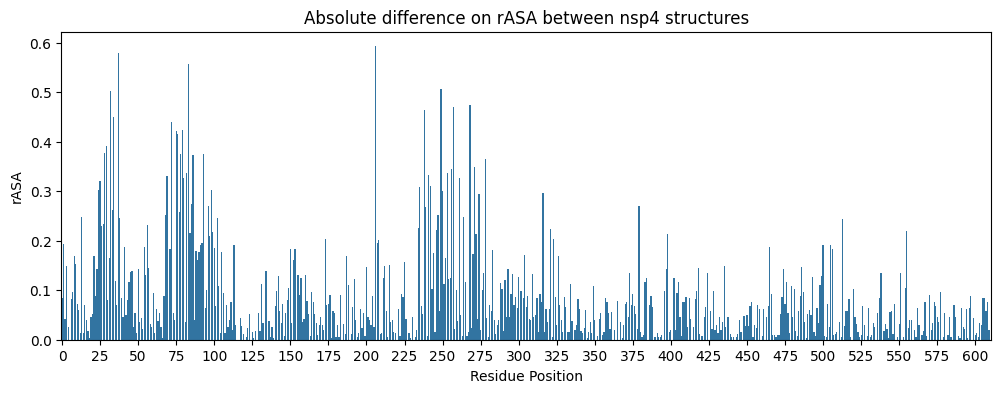

In [24]:
plt.figure(figsize=(12, 4))
plt.title('Absolute difference on rASA between nsp4 structures')
sns.barplot(x=res_rASA.position, y=res_rASA.abs_diff_rASA)
plt.ylabel('rASA')
plt.xlabel('Residue Position')
plt.xticks(dif.index[::25], dif.index[::25])
plt.savefig('results/alphavirus/nsp4_alphavirus_rASA_abs_diff.png')
plt.show()

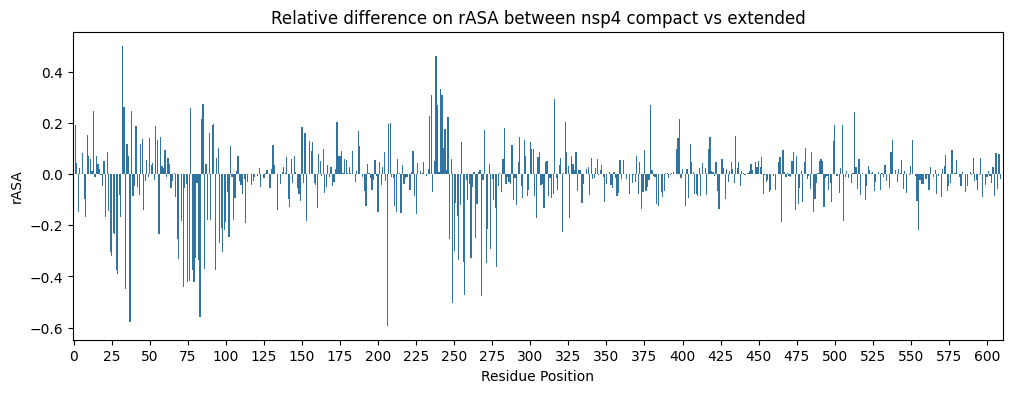

In [27]:
plt.figure(figsize=(12, 4))
plt.title('Relative difference on rASA between nsp4 compact vs extended')
sns.barplot(x=res_rASA.position, y=res_rASA.rel_comp_rASA)
plt.ylabel('rASA')
plt.xlabel('Residue Position')
plt.xticks(dif.index[::25], dif.index[::25])
plt.show()

In [33]:
# nsP4 compact
modify_bfactor('data/alphavirus/nsP4_pdb/nsp4-RdRp_compact.pdb', 'data/alphavirus/nsP4_pdb/nsp4-RdRp_compact_rASA_comp_x_ext.pdb', list(res_rASA.rel_comp_rASA))

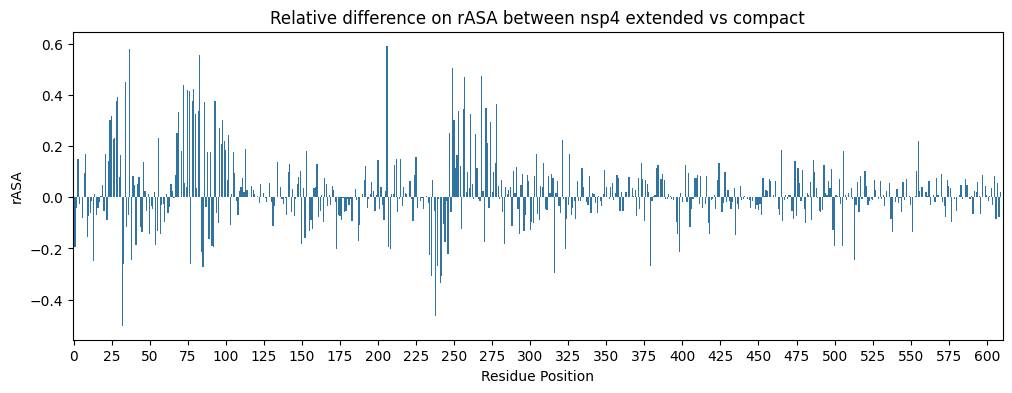

In [28]:
plt.figure(figsize=(12, 4))
plt.title('Relative difference on rASA between nsp4 extended vs compact')
sns.barplot(x=res_rASA.position, y=res_rASA.rel_ext_rASA)
plt.ylabel('rASA')
plt.xlabel('Residue Position')
plt.xticks(dif.index[::25], dif.index[::25])
plt.show()

In [35]:
# nsP4 extended
modify_bfactor('data/alphavirus/nsP4_pdb/nsp4-RdRp-SAXS_extended.pdb', 'data/alphavirus/nsP4_pdb/nsp4-RdRp_SAXS_extended_rASA_ext_x_comp.pdb', list(res_rASA.rel_ext_rASA))

In [ ]:
#spectrum b, blue_white_red, minimum=0, maximum=0.6